# Step 1: Load Data

In [76]:
# file = open('Royal_data.txt', 'r')
# royal_data = file.readlines()
# print(royal_data)
# file.close()

In [77]:
import requests

url = 'https://raw.githubusercontent.com/01745134/proyectos-ingenieria/main/actividad3/comida_mexicana.txt'  # replace with your URL
response = requests.get(url)
royal_data = response.text.splitlines()

print(royal_data)

['Los tacos son populares en México.', 'Las enchiladas son sabrosas y picantes.', 'El guacamole es cremoso y delicioso.', 'El mole es rico y complejo.', 'El pozole es reconfortante y sabroso.', 'Los tamales son tradicionales y llenadores.', 'Las carnitas son jugosas y tiernas.', 'Los chiles rellenos son picantes y gratinados.', 'Los frijoles refritos son suaves y sabrosos.', 'El ceviche es fresco y cítrico.', 'Los nachos son crujientes y deliciosos.', 'La salsa roja es picante y sabrosa.', 'El aguacate es cremoso y nutritivo.', 'Los churros son dulces y crujientes.', 'El mole verde es refrescante y sabroso.']


Removing '\n' from the end of every sentence and convert the sentence into lowercase

In [78]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data)             

['los tacos son populares en méxico.', 'las enchiladas son sabrosas y picantes.', 'el guacamole es cremoso y delicioso.', 'el mole es rico y complejo.', 'el pozole es reconfortante y sabroso.', 'los tamales son tradicionales y llenadores.', 'las carnitas son jugosas y tiernas.', 'los chiles rellenos son picantes y gratinados.', 'los frijoles refritos son suaves y sabrosos.', 'el ceviche es fresco y cítrico.', 'los nachos son crujientes y deliciosos.', 'la salsa roja es picante y sabrosa.', 'el aguacate es cremoso y nutritivo.', 'los churros son dulces y crujientes.', 'el mole verde es refrescante y sabroso.']


Removing stop words

In [79]:
# Get spanish stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
# In natural language processing (NLP), stopwords are words that are filtered out before or after processing text. 
# They are usually the most common words in a language and include words like 'the', 'is', 'at', 'which', and 'on'.
stopwords = stopwords.words('spanish')
print(stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [81]:
# Initialize an empty list to store the filtered data
filtered_data = []

# Loop over each sentence in the royal_data
for sent in royal_data:
    # Initialize a list to store the words in the current sentence
    temp = []
    
    # Split the sentence into words and loop over each word
    for word in sent.split():
        # If the word is not in the list of stopwords
        if word not in stopwords:
            # Append the word to the temporary list
            temp.append(word)
    
    # Append the temp list to the filtered data
    filtered_data.append(temp)

# Print the filtered data
print(filtered_data)

[['tacos', 'populares', 'méxico.'], ['enchiladas', 'sabrosas', 'picantes.'], ['guacamole', 'cremoso', 'delicioso.'], ['mole', 'rico', 'complejo.'], ['pozole', 'reconfortante', 'sabroso.'], ['tamales', 'tradicionales', 'llenadores.'], ['carnitas', 'jugosas', 'tiernas.'], ['chiles', 'rellenos', 'picantes', 'gratinados.'], ['frijoles', 'refritos', 'suaves', 'sabrosos.'], ['ceviche', 'fresco', 'cítrico.'], ['nachos', 'crujientes', 'deliciosos.'], ['salsa', 'roja', 'picante', 'sabrosa.'], ['aguacate', 'cremoso', 'nutritivo.'], ['churros', 'dulces', 'crujientes.'], ['mole', 'verde', 'refrescante', 'sabroso.']]


# Step 2: Create Biagrams

Creating bigrams

In [82]:
# Initialize an empty list to store the bigrams
bigrams = []

# Loop over each list of words in the filtered_data
for words_list in filtered_data:
    # Loop over each word in the current list, except the last one
    for i in range(len(words_list) - 1):
        # Loop over each word in the current list, starting from the next word
        for j in range(i+1, len(words_list)):
            # Append the pair of words (bigram) in both orders to the bigrams list
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])

# Print the list of bigrams
print(bigrams)

[['tacos', 'populares'], ['populares', 'tacos'], ['tacos', 'méxico.'], ['méxico.', 'tacos'], ['populares', 'méxico.'], ['méxico.', 'populares'], ['enchiladas', 'sabrosas'], ['sabrosas', 'enchiladas'], ['enchiladas', 'picantes.'], ['picantes.', 'enchiladas'], ['sabrosas', 'picantes.'], ['picantes.', 'sabrosas'], ['guacamole', 'cremoso'], ['cremoso', 'guacamole'], ['guacamole', 'delicioso.'], ['delicioso.', 'guacamole'], ['cremoso', 'delicioso.'], ['delicioso.', 'cremoso'], ['mole', 'rico'], ['rico', 'mole'], ['mole', 'complejo.'], ['complejo.', 'mole'], ['rico', 'complejo.'], ['complejo.', 'rico'], ['pozole', 'reconfortante'], ['reconfortante', 'pozole'], ['pozole', 'sabroso.'], ['sabroso.', 'pozole'], ['reconfortante', 'sabroso.'], ['sabroso.', 'reconfortante'], ['tamales', 'tradicionales'], ['tradicionales', 'tamales'], ['tamales', 'llenadores.'], ['llenadores.', 'tamales'], ['tradicionales', 'llenadores.'], ['llenadores.', 'tradicionales'], ['carnitas', 'jugosas'], ['jugosas', 'carni

Vocabulary

In [83]:
# Initialize an empty list to store all words
all_words = []

# Loop over each sentence in the filtered_data
for sent in filtered_data:
    # Extend the all_words list with the words in the current sentence
    all_words.extend(sent)

# Remove duplicates from the all_words list by converting it to a set and then back to a list
all_words = list(set(all_words))
all_words.sort() # Sort the list of all words in alphabetical order

print(all_words) # Print the list of all words
print(len(all_words)) # Print the total number of unique words

['aguacate', 'carnitas', 'ceviche', 'chiles', 'churros', 'complejo.', 'cremoso', 'crujientes', 'crujientes.', 'cítrico.', 'delicioso.', 'deliciosos.', 'dulces', 'enchiladas', 'fresco', 'frijoles', 'gratinados.', 'guacamole', 'jugosas', 'llenadores.', 'mole', 'méxico.', 'nachos', 'nutritivo.', 'picante', 'picantes', 'picantes.', 'populares', 'pozole', 'reconfortante', 'refrescante', 'refritos', 'rellenos', 'rico', 'roja', 'sabrosa.', 'sabrosas', 'sabroso.', 'sabrosos.', 'salsa', 'suaves', 'tacos', 'tamales', 'tiernas.', 'tradicionales', 'verde']
46


# Step 3: One-hot encoding

In [84]:
import numpy as np

In [85]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'aguacate': 0, 'carnitas': 1, 'ceviche': 2, 'chiles': 3, 'churros': 4, 'complejo.': 5, 'cremoso': 6, 'crujientes': 7, 'crujientes.': 8, 'cítrico.': 9, 'delicioso.': 10, 'deliciosos.': 11, 'dulces': 12, 'enchiladas': 13, 'fresco': 14, 'frijoles': 15, 'gratinados.': 16, 'guacamole': 17, 'jugosas': 18, 'llenadores.': 19, 'mole': 20, 'méxico.': 21, 'nachos': 22, 'nutritivo.': 23, 'picante': 24, 'picantes': 25, 'picantes.': 26, 'populares': 27, 'pozole': 28, 'reconfortante': 29, 'refrescante': 30, 'refritos': 31, 'rellenos': 32, 'rico': 33, 'roja': 34, 'sabrosa.': 35, 'sabrosas': 36, 'sabroso.': 37, 'sabrosos.': 38, 'salsa': 39, 'suaves': 40, 'tacos': 41, 'tamales': 42, 'tiernas.': 43, 'tradicionales': 44, 'verde': 45}


In [86]:
# Initialize a 2D numpy array of zeros with shape (len(all_words), len(all_words))
onehot_data = np.zeros((len(all_words), len(all_words)))

# Loop over each index in the range of the length of all_words
for i in range(len(all_words)):
    # Set the i-th element of the i-th row to 1, creating a one-hot encoded matrix
    onehot_data[i][i] = 1

# Initialize an empty dictionary to store the one-hot encodings
onehot_dict = {}

# Loop over each index in the range of the length of all_words
for i in range(len(all_words)):
    # Map each word in all_words to its corresponding one-hot encoding in onehot_data
    onehot_dict[all_words[i]] = onehot_data[i]
    
# Loop over each word in the onehot_dict
for word in onehot_dict:
    # Print the word and its corresponding one-hot encoding
    print(word, onehot_dict[word])

aguacate [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
carnitas [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ceviche [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
chiles [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
churros [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
complejo. [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
cremoso [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 

In [87]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]]) # First word of the bigram
    Y.append(onehot_dict[bi[1]]) # Second word of the bigram
    
X = np.array(X)
Y = np.array(Y)

# Step 4: Create Model and Train

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [89]:
model = Sequential()

vocal_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape=(vocal_size,)))
model.add(Dense(embed_size, activation='linear'))
model.add(Dense(vocal_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [90]:
model.fit(X, Y, epochs = 1000)

Epoch 1/1000


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8309
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8302 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8247  
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8278 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8261 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8228 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8187 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8174 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8210 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8207 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8181 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8170 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8227 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8168 
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8163 
Epoch 16/1000
4/4

# Step 5: Visualize results

In [91]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

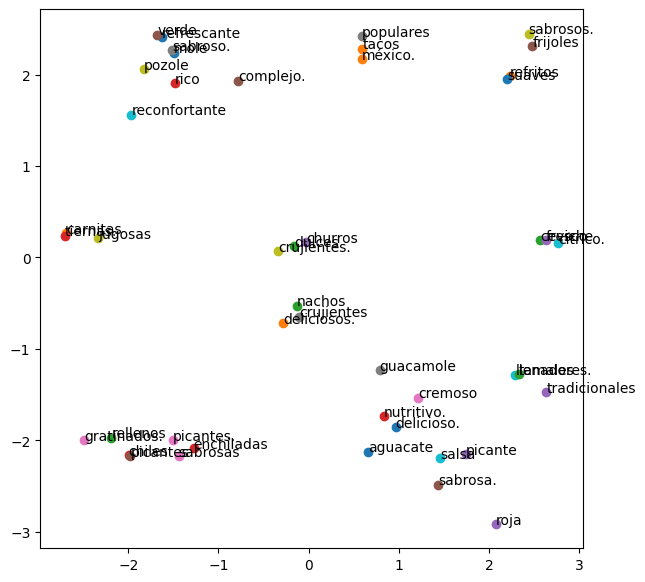

<Figure size 640x480 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))

for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.show()
plt.savefig('word_embeddings.png')

In [93]:
import plotly.graph_objects as go

fig = go.Figure()

for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    fig.add_trace(go.Scatter(x=[coord[0]], y=[coord[1]], text=[word], textposition='top center', name=word))

fig.show()

# Uso de los word embeddings

In [96]:
import pandas as pd

In [97]:
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the closest word to a vector:
def find_closest_word(v, k = 1):
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v
    # Get the norm of each difference vector.
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name

In [103]:
# This line of code is performing a vector operation on word embeddings.
# It's finding the word that is closest in the embedding space to the result of the operation "salsa" - "picante" + "nachos".
# The idea behind this operation is to find a word that has a similar relationship to "nachos" as "picante" does to "salsa".
find_closest_word(word_embeddings["salsa"] - word_embeddings["picante"] + word_embeddings["nachos"])

'deliciosos.'

In [104]:
# This line of code is performing a vector operation on word embeddings.
# It's finding the word that is closest in the embedding space to the result of the operation "salsa" - "picante" + "nachos".
# The idea behind this operation is to find a word that has a similar relationship to "churros" as "picante" does to "salsa".
find_closest_word(word_embeddings["salsa"] - word_embeddings["picante"] + word_embeddings["churros"])

'crujientes.'

In [106]:
# This line of code is performing a vector operation on word embeddings.
# It's finding the word that is closest in the embedding space to the result of the operation "salsa" - "picante" + "nachos".
# The idea behind this operation is to find a word that has a similar relationship to "tacos" as "picante" does to "salsa".
find_closest_word(word_embeddings["picantes"] - word_embeddings["enchiladas"] + word_embeddings["tacos"])

'méxico.'